In [ ]:
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.math import confusion_matrix

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df = df.drop(columns = ["id", "Unnamed: 32"])
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])

df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X = [df[i] for i in df.columns if i != "diagnosis"]
X = np.array(X)
X = X.T
Y = df["diagnosis"]

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.2)

X_train.shape
x_test.shape

y_test.shape

(114,)

In [ ]:
model = Sequential(
    [
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = "relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(256, activation = "relu"),
        keras.layers.Dense(512, activation = "relu"),
        keras.layers.Dense(1024, activation = "relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(512, activation = "relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(256, activation = "relu"),
        keras.layers.Dense(1, activation = "sigmoid")
    ]
)

model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train, Y_train, epochs = 30, batch_size = 16)

y_pred = model.predict(x_test)

Epoch 1/30
29/29 [==============================] - 4s 5ms/step - loss: 0.3387 - accuracy: 0.8593
Epoch 2/30
29/29 [==============================] - 0s 5ms/step - loss: 0.4101 - accuracy: 0.8440
Epoch 3/30
29/29 [==============================] - 0s 5ms/step - loss: 0.2423 - accuracy: 0.9077
Epoch 4/30
29/29 [==============================] - 0s 5ms/step - loss: 0.2655 - accuracy: 0.8989
Epoch 5/30
29/29 [==============================] - 0s 5ms/step - loss: 0.2664 - accuracy: 0.8989
Epoch 6/30
29/29 [==============================] - 0s 5ms/step - loss: 0.2330 - accuracy: 0.9011
Epoch 7/30
29/29 [==============================] - 0s 5ms/step - loss: 0.3168 - accuracy: 0.8725
Epoch 8/30
29/29 [==============================] - 0s 5ms/step - loss: 0.2112 - accuracy: 0.9077
Epoch 9/30
29/29 [==============================] - 0s 5ms/step - loss: 0.3058 - accuracy: 0.8703
Epoch 10/30
29/29 [==============================] - 0s 6ms/step - loss: 0.2090 - accuracy: 0.9143
Epoch 11/30
29/29 [

In [ ]:
#y_test = np.array([y_test])
#y_test = y_test.T

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0817 - accuracy: 0.9737


[0.08171243220567703, 0.9736841917037964]

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[71,  0],
       [41,  2]], dtype=int32)>

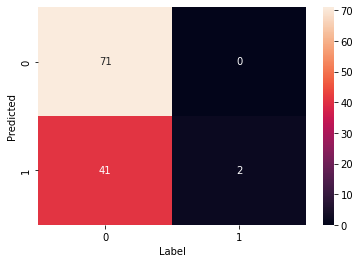

In [ ]:
sns.heatmap(cm, annot = True)
plt.xlabel("Label")
plt.ylabel("Predicted")
plt.show()

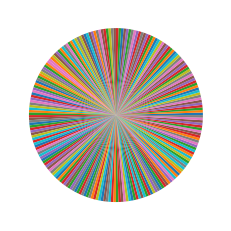

In [ ]:
Y = np.array(Y)
print(Y.shape
plt.pie(Y, )
plt.show()